In [0]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile 
with ZipFile('/content/drive/My Drive/chest-xray-pneumonia.zip', 'r') as zipObj:
   zipObj.extractall('/content/drive/My Drive/Data')

The above line of code is excecuted only once to unzip the datast and store it in desired loaction 

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.k eras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
vgg16=VGG16()

553467904/553467096 [==============================] - 8s 0us/step


In [0]:
# the acutually vgg16 model before any preprocessing

In [0]:
 vgg16.summary()
# this is the actuall vgg16 model before any of our processing

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
vgg = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)

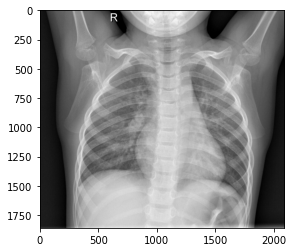

In [0]:
img=image.load_img('/content/drive/My Drive/Data/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(img)

In [0]:
vgg.summary()  
# this is our vgg model before we configure our output layers

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
for layer in vgg.layers:
    layer.trainable = False

In [0]:
import os
pwd='/content/drive/My Drive/Data/chest_xray/'
os.chdir(pwd)

In [0]:
folders = glob('train/*')

this is to specify the number of outputs.Our training folder has 2 sub folders so the resultant images should be classified into 2

In [0]:
x = Flatten()(vgg.output)
prediction= Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Using TensorFlow backend.


In [0]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Data/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [0]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Data/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [0]:
# from this

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=7,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)   
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/7
163/163 [==============================] - 122s 746ms/step - loss: 0.1917 - accuracy: 0.9199 - val_loss: 0.2678 - val_accuracy: 0.9022
Epoch 2/7
163/163 [==============================] - 120s 736ms/step - loss: 0.1136 - accuracy: 0.9546 - val_loss: 0.3676 - val_accuracy: 0.8926
Epoch 3/7
163/163 [==============================] - 120s 737ms/step - loss: 0.1040 - accuracy: 0.9622 - val_loss: 0.2673 - val_accuracy: 0.9247
Epoch 4/7
163/163 [==============================] - 119s 733ms/step - loss: 0.0832 - accuracy: 0.9691 - val_loss: 0.4761 - val_accuracy: 0.8221
Epoch 5/7
163/163 [==============================] - 119s 727ms/step - loss: 0.0805 - accuracy: 0.9712 - val_loss: 0.2694 - val_accuracy: 0.9167
Epoch 6/7
163/163 [==============================] - 119s 729ms/step - loss: 0.0681 - accuracy: 0.9737 - val_loss: 0.3798 - val_accuracy: 0.8926
Epoch 7/7
163/163 [==============================] - 1

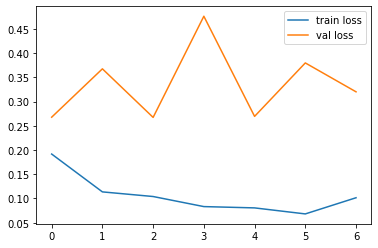

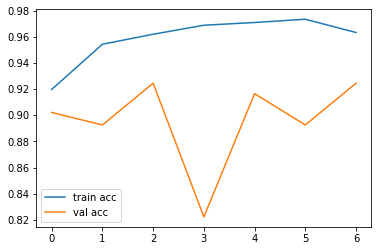

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [0]:
# as per the diagram we are getting maximum accuracy for no of epocs 6 so we will select the number of epocs as 7 and again train the model


In [0]:
from keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/model_vgg16_epoch7.h5')

The above code is used to save our trained model.So that we dont need to train it every time we open colab

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('/content/drive/My Drive/Colab Notebooks/model_vgg19.h5')
img=image.load_img('/content/drive/My Drive/Data/chest_xray/train/PNEUMONIA/person1124_bacteria_3065.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
# print(classes)
if(classes[1]==0):
    print('The patient is having PNEUMONIA')
else:
    print('The patient looks normal')

we load the already saved model and predict the images in the validation folder 